In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        dataset = os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
dataset
df = pd.read_csv(dataset)

In [3]:
df

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


In [4]:
column_names = df.columns
column_names

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')

In [5]:
df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [7]:
df['class'].value_counts()

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

<AxesSubplot:>

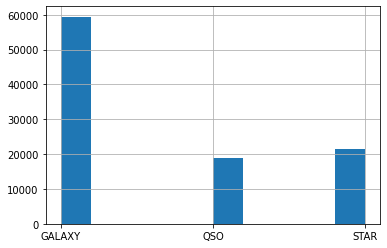

In [8]:
df['class'].hist()

<AxesSubplot:>

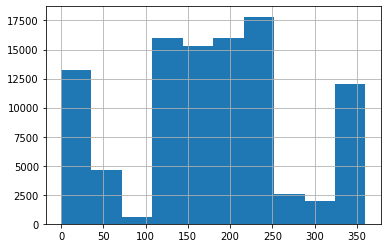

In [9]:
df['alpha'].hist()

In [10]:
df.corr().style.background_gradient()

/opt/conda/lib/python3.7/site-packages/pandas/io/formats/style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/opt/conda/lib/python3.7/site-packages/pandas/io/formats/style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
obj_ID,1.000000,-0.013735,-0.301237,0.015310,0.015710,0.153891,0.147670,0.013811,1.000000,nan,-0.046997,0.031498,0.239461,0.065400,0.239460,0.262687,0.067178
alpha,-0.013735,1.000000,0.138691,-0.001532,-0.002423,-0.022083,-0.023580,-0.002918,-0.013737,nan,0.019582,-0.165577,-0.002553,0.001667,-0.002554,0.019943,0.030464
delta,-0.301237,0.138691,1.000000,0.002074,0.003523,-0.006835,-0.004480,0.003630,-0.301238,nan,0.032565,-0.173416,0.112329,0.031638,0.112329,0.107333,0.028250
u,0.015310,-0.001532,0.002074,1.000000,0.999311,0.054149,0.045730,0.998093,0.015309,nan,0.003548,-0.008374,0.029997,0.014309,0.029997,0.031997,0.016305
g,0.015710,-0.002423,0.003523,0.999311,1.000000,0.062387,0.056271,0.999161,0.015710,nan,0.003508,-0.008852,0.039443,0.022954,0.039443,0.040274,0.017470
r,0.153891,-0.022083,-0.006835,0.054149,0.062387,1.000000,0.962868,0.053677,0.153889,nan,0.008480,-0.026423,0.655245,0.433241,0.655243,0.671180,0.223106
i,0.147670,-0.023580,-0.004480,0.045730,0.056271,0.962868,1.000000,0.055994,0.147668,nan,0.007615,-0.026679,0.661641,0.492383,0.661640,0.672523,0.214787
z,0.013811,-0.002918,0.003630,0.998093,0.999161,0.053677,0.055994,1.000000,0.013811,nan,0.003365,-0.008903,0.037813,0.030380,0.037813,0.037469,0.014668
run_ID,1.000000,-0.013737,-0.301238,0.015309,0.015710,0.153889,0.147668,0.013811,1.000000,nan,-0.047098,0.031498,0.239460,0.065400,0.239459,0.262687,0.067165
rerun_ID,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [11]:
df = df.drop(columns=['obj_ID', 'rerun_ID', 'spec_obj_ID'])

In [12]:
df.head(10)

,alpha,delta,u,g,r,i,z,run_ID,cam_col,field_ID,class,redshift,plate,MJD,fiber_ID
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,2,79,GALAXY,0.634794,5812,56354,171
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,5,119,GALAXY,0.779136,10445,58158,427
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,2,120,GALAXY,0.644195,4576,55592,299
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,3,214,GALAXY,0.932346,9149,58039,775
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,3,137,GALAXY,0.116123,6121,56187,842
5,340.995121,20.589476,23.48827,23.33776,21.32195,20.25615,19.54544,8102,3,110,QSO,1.424659,5026,55855,741
6,23.234926,11.418188,21.46973,21.17624,20.92829,20.60826,20.42573,7773,2,462,QSO,0.586455,11069,58456,113
7,5.433176,12.065186,22.24979,22.02172,20.34126,19.48794,18.84999,7773,2,346,GALAXY,0.477009,6183,56210,15
8,200.290475,47.199402,24.40286,22.35669,20.61032,19.46490,18.95852,3716,5,108,GALAXY,0.660012,6625,56386,719
9,39.149691,28.102842,21.74669,20.03493,19.17553,18.81823,18.65422,5934,4,122,STAR,-0.000008,2444,54082,232


In [13]:
df.corr()

,alpha,delta,u,g,r,i,z,run_ID,cam_col,field_ID,redshift,plate,MJD,fiber_ID
alpha,1.000000,0.138691,-0.001532,-0.002423,-0.022083,-0.023580,-0.002918,-0.013737,0.019582,-0.165577,0.001667,-0.002554,0.019943,0.030464
delta,0.138691,1.000000,0.002074,0.003523,-0.006835,-0.004480,0.003630,-0.301238,0.032565,-0.173416,0.031638,0.112329,0.107333,0.028250
u,-0.001532,0.002074,1.000000,0.999311,0.054149,0.045730,0.998093,0.015309,0.003548,-0.008374,0.014309,0.029997,0.031997,0.016305
g,-0.002423,0.003523,0.999311,1.000000,0.062387,0.056271,0.999161,0.015710,0.003508,-0.008852,0.022954,0.039443,0.040274,0.017470
r,-0.022083,-0.006835,0.054149,0.062387,1.000000,0.962868,0.053677,0.153889,0.008480,-0.026423,0.433241,0.655243,0.671180,0.223106
i,-0.023580,-0.004480,0.045730,0.056271,0.962868,1.000000,0.055994,0.147668,0.007615,-0.026679,0.492383,0.661640,0.672523,0.214787
z,-0.002918,0.003630,0.998093,0.999161,0.053677,0.055994,1.000000,0.013811,0.003365,-0.008903,0.030380,0.037813,0.037469,0.014668
run_ID,-0.013737,-0.301238,0.015309,0.015710,0.153889,0.147668,0.013811,1.000000,-0.047098,0.031498,0.065400,0.239459,0.262687,0.067165
cam_col,0.019582,0.032565,0.003548,0.003508,0.008480,0.007615,0.003365,-0.047098,1.000000,-0.015684,0.000097,-0.001949,-0.006745,0.121597
field_ID,-0.165577,-0.173416,-0.008374,-0.008852,-0.026423,-0.026679,-0.008903,0.031498,-0.015684,1.000000,-0.021331,-0.083471,-0.095064,-0.012337


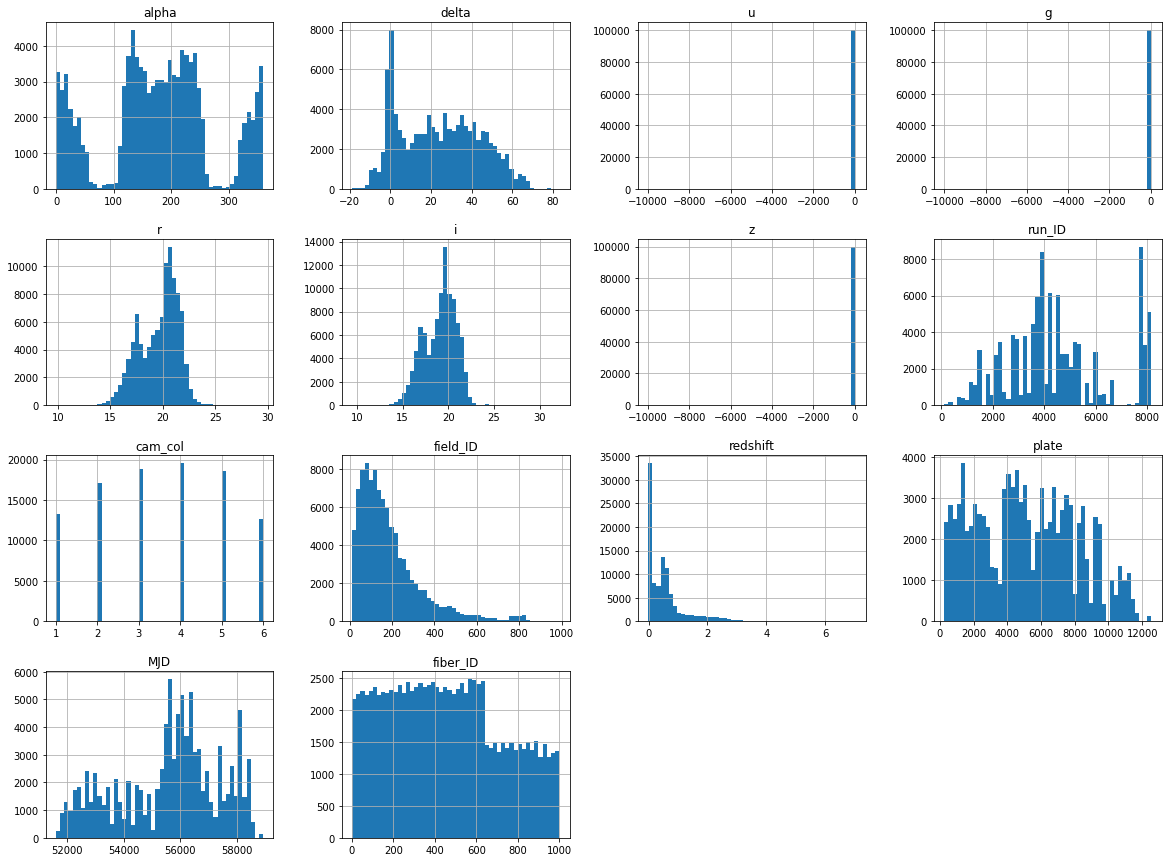

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
df.hist(bins=50, figsize=(20,15))
plt.show()

In [15]:
df.describe().T.style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
alpha,100000.000000,177.629117,96.502241,0.005528,127.518222,180.900700,233.895005,359.999810
delta,100000.000000,24.135305,19.644665,-18.785328,5.146771,23.645922,39.901550,83.000519
u,100000.000000,21.980468,31.769291,-9999.000000,20.352353,22.179135,23.687440,32.781390
g,100000.000000,20.531387,31.750292,-9999.000000,18.965230,21.099835,22.123767,31.602240
r,100000.000000,19.645762,1.854760,9.822070,18.135828,20.125290,21.044785,29.571860
i,100000.000000,19.084854,1.757895,9.469903,17.732285,19.405145,20.396495,32.141470
z,100000.000000,18.668810,31.728152,-9999.000000,17.460677,19.004595,19.921120,29.383740
run_ID,100000.000000,4481.366060,1964.764593,109.000000,3187.000000,4188.000000,5326.000000,8162.000000
cam_col,100000.000000,3.511610,1.586912,1.000000,2.000000,4.000000,5.000000,6.000000
field_ID,100000.000000,186.130520,149.011073,11.000000,82.000000,146.000000,241.000000,989.000000


### Important MJD is the number of days since midnight Nov. 17, 1858. Calculated by subtracting 2,400,000.5 days from the Julian data JD.
* Hence why the values for MJD are centered around 55K
* Just represents a "date" when an observation was recorded

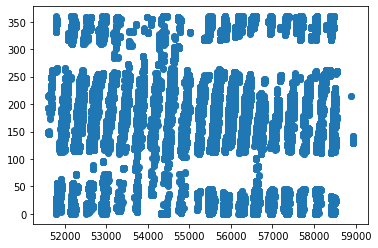

In [16]:
plt.scatter(df['MJD'], df['alpha']) ## Data is random and not sorted based on MJD. Can assume the data is "shuffled."

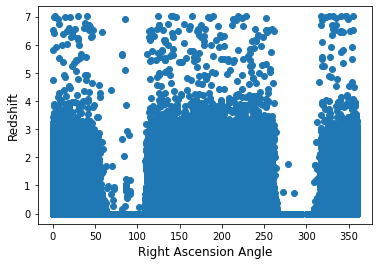

In [17]:
## Right Ascension Angle is a angular distance measured eastward along the celestial equator from the sun at the march equinox
## to the point in question above the earth.
## All data, should look at based on class, could be the reason for breaks in redshift.
plt.scatter(df['alpha'], df['redshift'])
plt.xlabel('Right Ascension Angle', fontsize=12)
plt.ylabel('Redshift', rotation=90, fontsize=12)
plt.show()

In [18]:
classes = df['class'].unique()
classes

array(['GALAXY', 'QSO', 'STAR'], dtype=object)

In [19]:
galaxy = df[df['class'] == 'GALAXY']
qso = df[df['class'] == 'QSO']
star = df[df['class'] == 'STAR']

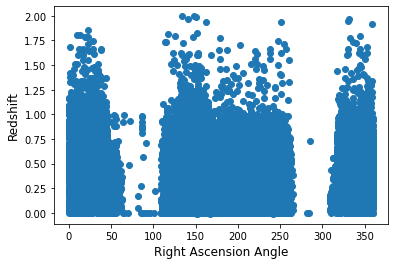

In [20]:
# Galaxy
plt.scatter(galaxy['alpha'], galaxy['redshift'])
plt.xlabel('Right Ascension Angle', fontsize=12)
plt.ylabel('Redshift', rotation=90, fontsize=12)
plt.show()

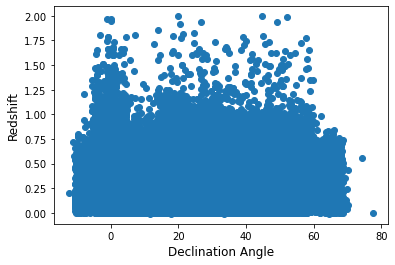

In [21]:
# Galaxy
plt.scatter(galaxy['delta'], galaxy['redshift'])
plt.xlabel('Declination Angle', fontsize=12)
plt.ylabel('Redshift', rotation=90, fontsize=12)
plt.show()

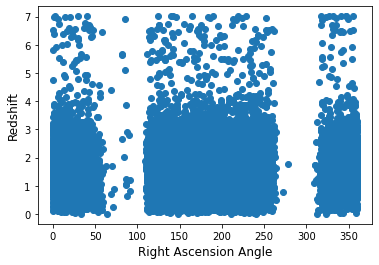

In [22]:
# QSO
plt.scatter(qso['alpha'], qso['redshift'])
plt.xlabel('Right Ascension Angle', fontsize=12)
plt.ylabel('Redshift', rotation=90, fontsize=12)
plt.show()

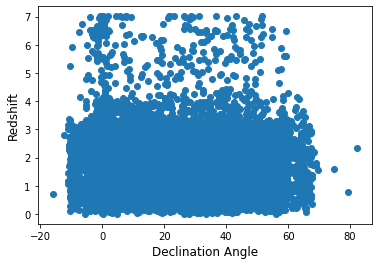

In [23]:
# QSO Declination Angle
plt.scatter(qso['delta'], qso['redshift'])
plt.xlabel('Declination Angle', fontsize=12)
plt.ylabel('Redshift', rotation=90, fontsize=12)
plt.show()

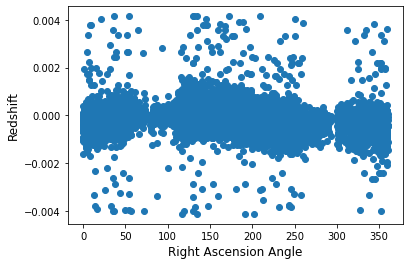

In [24]:
# Star
plt.scatter(star['alpha'], star['redshift'])
plt.xlabel('Right Ascension Angle', fontsize=12)
plt.ylabel('Redshift', rotation=90, fontsize=12)
plt.show()

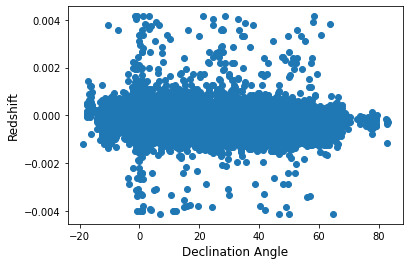

In [25]:
# Star
plt.scatter(star['delta'], star['redshift'])
plt.xlabel('Declination Angle', fontsize=12)
plt.ylabel('Redshift', rotation=90, fontsize=12)
plt.show()

In [26]:
## To test whether the observations should be in accordance with the MJD, sort the data for one of the classes (e.g. Galaxy)
galaxy_sorted = galaxy.sort_values(by='MJD', ascending=True)
galaxy_sorted.head(10)

,alpha,delta,u,g,r,i,z,run_ID,cam_col,field_ID,class,redshift,plate,MJD,fiber_ID
12866,147.366840,0.968375,20.57743,18.60067,17.79560,17.34576,17.05482,1239,6,180,GALAXY,0.102337,267,51608,361
5390,148.137883,0.984109,17.94048,15.85076,14.92413,14.48684,14.15116,1239,6,185,GALAXY,0.046764,267,51608,534
64380,147.905371,0.412109,19.64714,18.28406,17.62482,17.22549,16.91500,756,4,214,GALAXY,0.093513,267,51608,476
62175,149.184901,0.242107,19.96493,18.18508,17.27958,16.87634,16.57329,756,4,223,GALAXY,0.086801,267,51608,637
74643,147.931189,0.952106,19.20417,17.94598,17.54855,17.33980,17.20803,1239,6,184,GALAXY,0.027198,267,51608,460
25727,148.753530,-0.596168,22.90627,21.35220,19.53974,18.70143,18.19042,756,2,220,GALAXY,0.468987,267,51608,104
37304,147.165549,-0.891313,21.21101,18.92085,17.65245,17.14530,16.75657,756,1,209,GALAXY,0.167423,267,51608,286
60850,149.032392,0.288143,19.69001,18.45888,17.75000,17.33397,17.07845,756,4,222,GALAXY,0.126991,267,51608,635
70556,148.401162,1.012705,20.12780,18.40786,17.59170,17.16464,16.88550,1239,6,187,GALAXY,0.098459,267,51608,566
79884,192.973437,-1.064211,19.97748,17.87782,16.83852,16.31926,15.87980,752,1,330,GALAXY,0.094234,292,51609,55


In [27]:
galaxy_sorted_grouped = galaxy_sorted.groupby('MJD').mean()
galaxy_sorted_grouped.head(15)

,alpha,delta,u,g,r,i,z,run_ID,cam_col,field_ID,redshift,plate,fiber_ID
MJD,,,,,,,,,,,,,
51608,148.208757,0.374686,20.141027,18.445149,17.522952,17.068841,16.757027,970.666667,4.333333,202.666667,0.135386,267.000000,451.000000
51609,207.625713,-0.590564,19.377360,17.823007,17.159710,16.791153,16.489690,752.000000,2.333333,428.000000,0.061666,300.000000,126.000000
51613,216.793894,-0.098271,20.538945,18.806807,17.541785,17.056567,16.720500,1160.750000,4.500000,472.000000,0.198519,305.000000,320.500000
51630,146.332253,0.743946,19.970751,18.165341,17.207154,16.734704,16.409291,1185.928571,5.071429,175.142857,0.101726,266.000000,460.000000
51633,150.298371,0.252925,19.391820,17.862460,17.088100,16.669940,16.334790,756.000000,4.000000,230.000000,0.104634,268.000000,594.000000
51637,217.780550,-0.212520,21.735200,19.181985,17.720355,17.146555,16.790855,754.000000,3.000000,588.500000,0.223804,306.000000,213.000000
51658,172.854744,-0.563943,21.357290,19.588020,17.908620,17.316030,16.920630,756.000000,2.000000,381.000000,0.327800,282.000000,262.000000
51662,221.648594,-0.146910,20.486244,18.703812,17.844590,17.426388,17.195464,1079.000000,4.200000,508.000000,0.146950,308.000000,332.600000
51663,224.782776,-0.508379,20.817307,18.968828,17.686762,17.128382,16.754200,1295.666667,3.666667,458.333333,0.229458,309.666667,179.833333


From the above, these observations are continuous. The issue is the time in which and observation was recorded, i.e the MJD has some discontinuites or breaks in the number of days between the observations.

Lets look at the entire dataset and see if the observations are continuous but the observations recorded are for the different classes.

In [28]:
df_sorted = df.sort_values(by='MJD', ascending=True)

In [29]:
df_sorted.groupby('MJD').mean() 
# Looks like we were wrong in thinking it has something to do with the classes 
# but it looks like its based on the orientation of the earth which should have been obvious

,alpha,delta,u,g,r,i,z,run_ID,cam_col,field_ID,redshift,plate,fiber_ID
MJD,,,,,,,,,,,,,
51608,148.159737,0.026797,20.132922,18.524416,17.647290,17.240826,16.974977,957.250000,3.500000,203.166667,0.210030,267.000000,370.750000
51609,202.482177,-0.065795,18.724939,17.554847,17.154004,16.951444,16.824313,752.000000,3.571429,393.428571,0.130365,297.142857,282.428571
51613,216.793894,-0.098271,20.538945,18.806807,17.541785,17.056567,16.720500,1160.750000,4.500000,472.000000,0.198519,305.000000,320.500000
51615,205.631109,0.078941,18.870035,17.298535,16.733937,16.517875,16.439520,752.000000,4.000000,414.750000,0.000008,308.000000,409.750000
51630,146.332253,0.743946,19.970751,18.165341,17.207154,16.734704,16.409291,1185.928571,5.071429,175.142857,0.101726,266.000000,460.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58895,215.141823,53.104905,21.809715,21.386790,21.032305,20.762430,20.865155,3705.000000,2.000000,112.000000,1.374917,7339.000000,529.500000
58928,138.552529,2.081597,22.374361,21.286778,20.364774,19.898053,19.665671,5114.923077,3.948718,138.512821,0.677337,12545.000000,611.615385
58930,134.522335,0.774114,21.846265,21.152275,20.381173,19.987662,19.694133,1486.645161,3.709677,90.838710,0.887323,12535.129032,371.225806


## Now lets see some patterns in the angles for the three classes

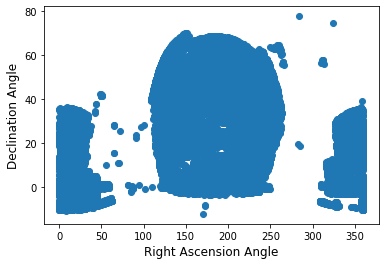

In [30]:
# Galaxy
plt.scatter(galaxy['alpha'], galaxy['delta'])
plt.xlabel('Right Ascension Angle', fontsize=12)
plt.ylabel('Declination Angle', rotation=90, fontsize=12)
plt.show()

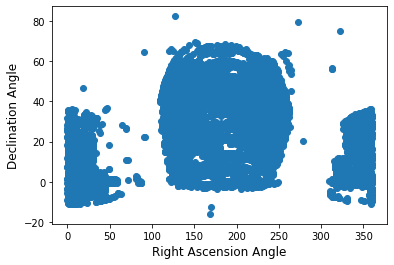

In [31]:
# QSO
plt.scatter(qso['alpha'], qso['delta'])
plt.xlabel('Right Ascension Angle', fontsize=12)
plt.ylabel('Declination Angle', rotation=90, fontsize=12)
plt.show()

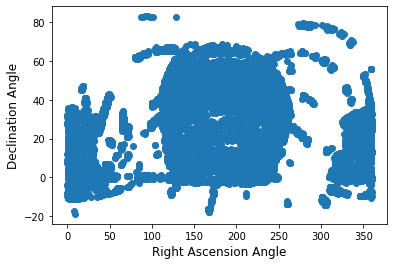

In [32]:
# Star
plt.scatter(star['alpha'], star['delta'])
plt.xlabel('Right Ascension Angle', fontsize=12)
plt.ylabel('Declination Angle', rotation=90, fontsize=12)
plt.show()

### Lets look at some of the instrument parameters for each class

array([[<AxesSubplot:title={'center':'u'}>]], dtype=object)

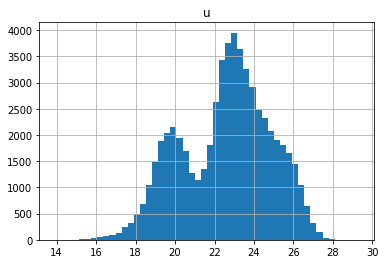

In [33]:
parameters = ['u', 'g', 'r', 'i', 'z']
galaxy.hist(column='u', bins=50)

array([[<AxesSubplot:title={'center':'u'}>]], dtype=object)

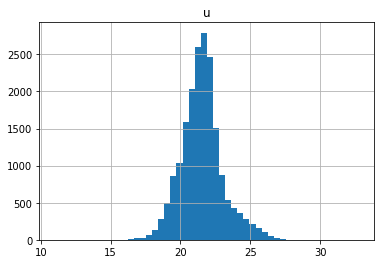

In [34]:
qso.hist(column='u', bins=50)

In [35]:
star.u.describe()

count    21594.000000
mean        20.689805
std         68.228825
min      -9999.000000
25%         19.327275
50%         21.010555
75%         22.960617
max         30.660390
Name: u, dtype: float64

In [36]:
# will more than likely drop this row since the u, g, z are below 0
star[star['u'] <= 0.]

,alpha,delta,u,g,r,i,z,run_ID,cam_col,field_ID,class,redshift,plate,MJD,fiber_ID
79543,224.006526,-0.624304,-9999.0,-9999.0,18.1656,18.01675,-9999.0,752,2,537,STAR,0.000089,3314,54970,162


In [37]:
star = star.drop(index=79543, axis=0)

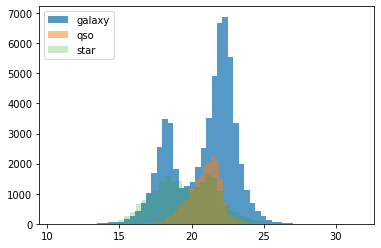

In [38]:
plt.hist(x=galaxy.g, bins=50, alpha=0.75, label='galaxy')
plt.hist(x=qso.g, bins=50, alpha=0.5, label='qso')
plt.hist(x=star.g, bins=50, alpha=0.25, label='star')
plt.legend(loc='upper left')

In [39]:
df = df.drop(index=79543, axis=0)
df.describe()

,alpha,delta,u,g,r,i,z,run_ID,cam_col,field_ID,redshift,plate,MJD,fiber_ID
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,177.628653,24.135552,22.080679,20.631583,19.645777,19.084865,18.768988,4481.403354,3.511625,186.127011,0.576667,5137.027890,55588.653687,449.315613
std,96.502612,19.644608,2.251068,2.037384,1.854763,1.757900,1.765982,1964.739021,1.586913,149.007687,0.730709,2952.312485,1808.492217,272.498252
min,0.005528,-18.785328,10.996230,10.498200,9.822070,9.469903,9.612333,109.000000,1.000000,11.000000,-0.009971,266.000000,51608.000000,1.000000
25%,127.517698,5.147477,20.352410,18.965240,18.135795,17.732280,17.460830,3187.000000,2.000000,82.000000,0.054522,2526.000000,54234.000000,221.000000
50%,180.900527,23.646462,22.179140,21.099930,20.125310,19.405150,19.004600,4188.000000,4.000000,146.000000,0.424176,4987.000000,55869.000000,433.000000
75%,233.895005,39.901582,23.687480,22.123775,21.044790,20.396510,19.921120,5326.000000,5.000000,241.000000,0.704172,7400.500000,56777.000000,645.000000
max,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,6.000000,989.000000,7.011245,12547.000000,58932.000000,1000.000000


In [40]:
target = df['class']
df_dropped = df.drop(columns='class', axis=1)

In [41]:
df_dropped

,alpha,delta,u,g,r,i,z,run_ID,cam_col,field_ID,redshift,plate,MJD,fiber_ID
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,2,79,0.634794,5812,56354,171
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,5,119,0.779136,10445,58158,427
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,2,120,0.644195,4576,55592,299
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,3,214,0.932346,9149,58039,775
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,3,137,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,2,581,0.000000,9374,57749,438
99996,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,1,289,0.404895,7626,56934,866
99997,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,4,308,0.143366,2764,54535,74
99998,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,4,131,0.455040,6751,56368,470


Text(0, 0.5, 'Counts')

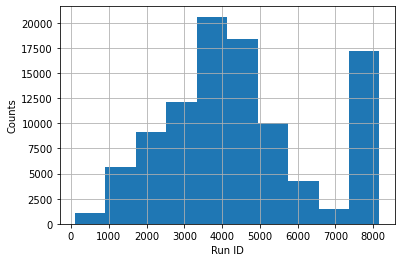

In [42]:
df_dropped['run_ID'].hist()
plt.xlabel('Run ID')
plt.ylabel('Counts')